1
2
3
4
5
6
7
8
9
10
11
11
11
11
11
11
11
11
11
11


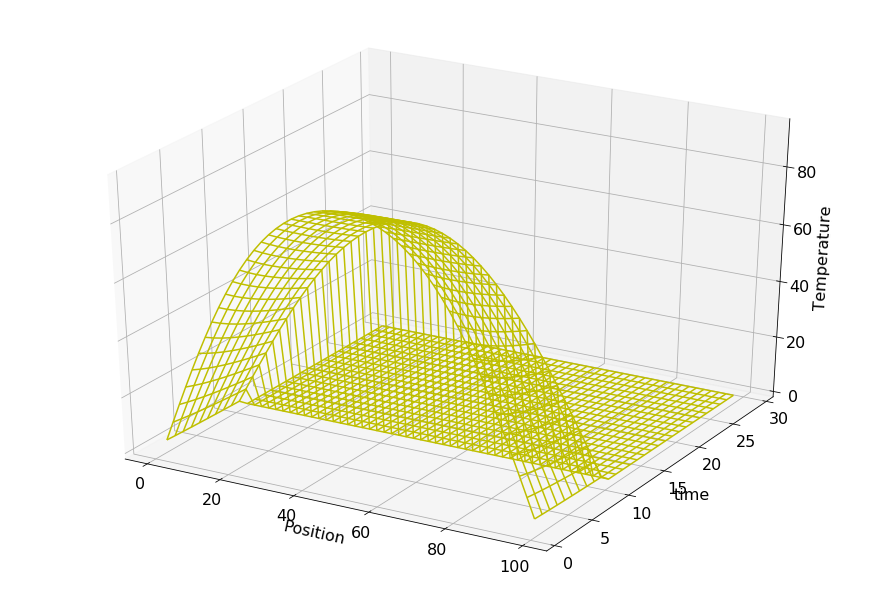

finished
[[ 0.          0.        ]
 [ 2.4376547   2.4376547 ]
 [ 4.8725878   4.8725878 ]
 [ 7.30208319  7.30208319]
 [ 9.72343573  9.72343573]
 [12.13395661 12.13395661]
 [14.53097874 14.53097874]
 [16.91186185 16.91186185]
 [19.27399763 19.27399763]
 [21.61481452 21.61481452]
 [23.93178244 23.93178244]
 [26.22241722 26.22241722]
 [28.48428479 28.48428479]
 [30.71500515 30.71500515]
 [32.91225603 32.91225603]
 [35.0737762  35.0737762 ]
 [37.19736862 37.19736862]
 [39.28090306 39.28090306]
 [41.3223186  41.3223186 ]
 [43.31962564 43.31962564]
 [45.27090769 45.27090769]
 [47.1743227  47.1743227 ]
 [49.02810421 49.02810421]
 [50.83056205 50.83056205]
 [52.58008277 52.58008277]
 [54.27512978 54.27512978]
 [55.91424315 55.91424315]
 [57.49603919 57.49603919]
 [59.01920971 59.01920971]
 [60.48252108 60.48252108]
 [61.88481302 61.88481302]
 [63.2249973  63.2249973 ]
 [64.5020561  64.5020561 ]
 [65.71504037 65.71504037]
 [66.86306798 66.86306798]
 [67.9453218  67.9453218 ]
 [68.96104772 68.96

In [73]:
#Exercise 1


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 



Nx    = 101      
Nt    = 3000   
Dx    = 0.03  
Dt    = 0.9                                                              
K     = 210.
C     = 900.
p     = 2700.                                                     
T     = np.zeros( (Nx+100, 2), float);    #creating the array
Tpl   = np.zeros( (Nx, 31), float)  
                                     


for ix in range (1, Nx - 1):   #Here, I want to iterate each point on the bar +100
    T[ix, 0] = 100.0;               

T[0,0] = 0.0     #Each endpoint is set to 0
T[0,1] = 0.                           
T[Nx-1,0] = 0.
T[Nx-1,1] = 0.0



n = K/(C*p)*Dt/(Dx*Dx);                             
j = 1                                                           

for t in range (1, Nt):                                  
   
   for ix in range (1, Nx - 1):                       
    T[ix, 1] = T[ix, 0] +  cons*(T[ix+1, 0] + T[ix-1, 0] - 2.*T[ix,0])                                                        
   
   if (t % 300 == 0 or t == 1):                            
        for ix in range (1, Nx - 1, 2): Tpl[ix, j] = T[ix, 1]   
        print(j)   
        j = j + 1                        
   
   for ix in range (1, Nx - 1):  
        T[ix, 0] = T[ix, 1] 
        
n = K/(C*p)*Dt/(Dx*Dx);                             # constant
j = 1                                                           # counter

for t in range (1, Nt):                                  
   
   for ix in range (1, Nx - 1):                       
      T[ix, 1] = T[ix, 0] +  cons*(T[ix+1, 0] + T[ix-1, 0] - 2.*T[ix,0])                                                        
   
   if (t % 300 == 0 or t == 1):                            # Every 300 steps
        for ix in range (1, Nx - 1, 2): Tpl[ix, j] = T[ix, 1]   
        print(m)   
        j = j + 1                        
   
   for ix in range (1, Nx - 1):  
        T[ix, 0] = T[ix, 1] 


x = list(range(1, Nx - 1, 2))                       
y = list(range(1, 30))                       
X, Y = np.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tpl)              
fig = plt.figure(figsize=(12,8))                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'y')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
plt.show()                               
print("finished")

print(T)


Above, I am not very sure why there are an extensive amount of zeros towards the end of the matrix.
                

In [ ]:
#Different Attempt



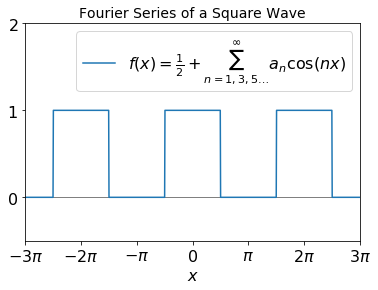

In [98]:
#Exercise 2
import scipy.signal as signal

pi = np.pi
x  = np.linspace(-3*pi, 3*pi, 1000)

plt.axhline(0, color='gray', lw=1)

squarewave = 0.5 + 0.5 * signal.square(x + pi/2)

plt.plot(x, squarewave, lw=1.5, label=r'$f(x)=\frac{1}{2} + \sum_{n=1,3,5\ldots}^{\infty}a_n \cos(nx)$')

plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks([-3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi], ['$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$'])
plt.xlim(-3*pi, 3*pi)
plt.ylim(-0.5, 2)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier Series of a Square Wave', fontsize=14)
plt.xlabel('$x$')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()

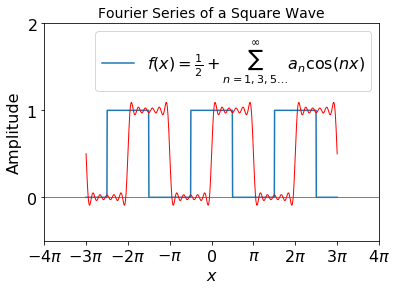

In [99]:
def SquareFourier(M,t):       #Assume T is 2pi                                   
    sumy  = 1/2                                                              
    for m in range(1,M):                                         
        if m%2==0:
            coeff = 0
        if m%2==1:
            coeff = (-2)/(pi*m)
        sumy += coeff*-1*np.sin(m*t)                           
    return sumy


plt.axhline(0, color='gray', lw=1)

squarewave = 0.5 + 0.5 * signal.square(x + pi/2)

plt.plot(x, squarewave, lw=1.5, label=r'$f(x)=\frac{1}{2} + \sum_{n=1,3,5\ldots}^{\infty}a_n \cos(nx)$')

s = SquareFourier(12, x)   
lines, = plt.plot(x, s, lw=1, color='red')

plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-0.5, 2)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier Series of a Square Wave', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()

No handles with labels found to put in legend.


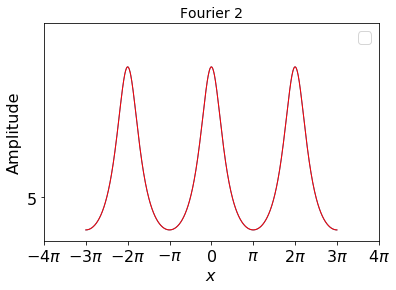

No handles with labels found to put in legend.


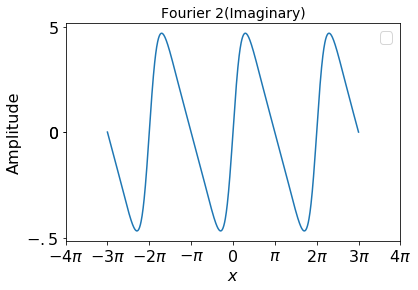

In [116]:
#2
def Fourier2(M,t):
    sumy=5/8
    for m in range(1, M):
        coeff = 1.25*(3**-abs(m))
        sumy += coeff*(np.cos(m*t)+1j*np.sin(m*t))
    return(sumy)

s1 = Fourier2(12, x)   
plt.plot(x, s1.real, lw=1)
lines, = plt.plot(x, s1.real, lw=1, color='red')

plt.yticks([-.5, 0, .5, 0], ['$-.5$', '$0$', '$5$', '$0$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(.25, 1.5)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier 2', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()


plt.plot(x, s1.imag)
plt.yticks([-.5, 0, .5, 0], ['$-.5$', '$0$', '$5$', '$0$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier 2(Imaginary)', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()



    

No handles with labels found to put in legend.


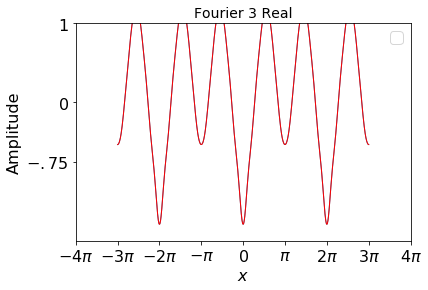

No handles with labels found to put in legend.


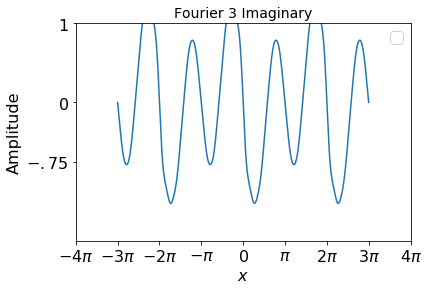

In [118]:
def Fourier3(M,t):
    sumy=2/(5*pi)
    for m in range(1, M):
        coeff = ((-5/((m**2)+1))+(8/(9-(4*m**2)))+(10/((4*m**2)-25)))/pi
        sumy += coeff*(np.cos(m*t)+1j*np.sin(m*t))
    return(sumy)

s2 = Fourier3(12, x)   
plt.plot(x, s2.real, lw=1)
lines, = plt.plot(x, s2.real, lw=1, color='red')

plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier 3 Real', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()

plt.plot(x, s2.imag)
plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier 3 Imaginary', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()


In [134]:
#Decompose

def Fouriera(M,t):
    sumy=2/(5*pi)
    for m in range(1, M):
        coeff = ((-5/((m**2)+1))+(8/(9-(4*m**2)))+(10/((4*m**2)-25)))/pi
        sumy += coeff*(np.cos(m*t)+1j*np.sin(m*t))
    return(sumy)

s3 = Fouriera(12, x)   
plt.plot(x, s3.real, lw=1)
lines, = plt.plot(x, s3.real, lw=1, color='red')

plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier a Real', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()

plt.plot(x, s2.imag)
plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier a Imaginary', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()


SyntaxError: invalid syntax (<ipython-input-134-2c573a5946fc>, line 7)

No handles with labels found to put in legend.


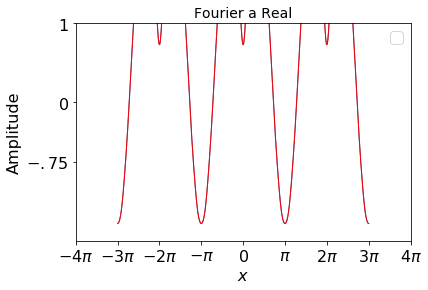

No handles with labels found to put in legend.


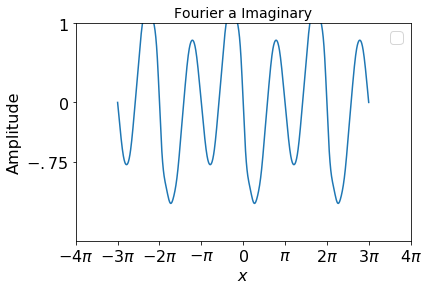

In [135]:

def Fourierb(M,t):
    sumy=1
    for m in range(1, M):
        coeff = (8/(9-(4*m**2)))
        sumy += coeff*(np.cos(m*t)+1j*np.sin(m*t))
    return(sumy)

s4 = Fourierb(12, x)   
plt.plot(x, s4.real, lw=1)
lines, = plt.plot(x, s4.real, lw=1, color='red')

plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier a Real', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()

plt.plot(x, s2.imag)
plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier a Imaginary', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()

No handles with labels found to put in legend.


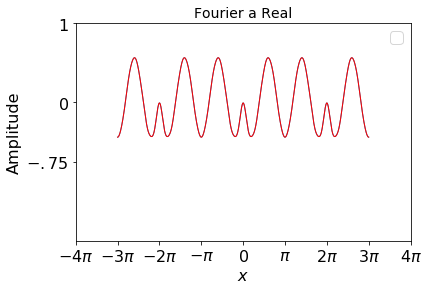

No handles with labels found to put in legend.


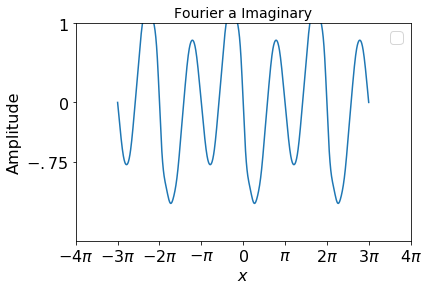

In [137]:

def Fourierc(M,t):
    sumy=0
    for m in range(1, M):
        coeff = (10/((4*m**2)-25))/pi
        sumy += coeff*(np.cos(m*t)+1j*np.sin(m*t))
    return(sumy)

s5 = Fourierc(12, x)   
plt.plot(x, s5.real, lw=1)
lines, = plt.plot(x, s5.real, lw=1, color='red')

plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier a Real', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()

plt.plot(x, s2.imag)
plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier a Imaginary', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()

In [142]:
s= Fouriera(12, x)+Fourierb(12, x)+Fourierc(12, x)

plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier 3 Real', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()

plt.plot(x, s2.imag)
plt.yticks([-.75, 0, 1], ['$-.75$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi], ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.xlim(-4*pi, 4*pi)
plt.ylim(-1.75, 1)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier 3 Imaginary', fontsize=14)
plt.xlabel('$x$')
plt.ylabel('Amplitude')
plt.legend(fontsize=16, fancybox=True, loc='best')
plt.show()



NameError: name 'Fourierb' is not defined

I am not sure why I am getting a Fourier B not defined when it clearly is defined as a function above.